In [67]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import cv2


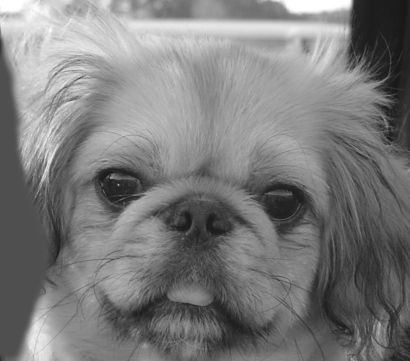

In [68]:
image = Image.open("/Users/elisegreen/Downloads/dog.jpg")
#coverting the image to black and white so it is easier to process
image = image.convert('L')
image

In [69]:
#now covert the image to an array so we can  apply computations of it. 

dog_array = np.array(image)

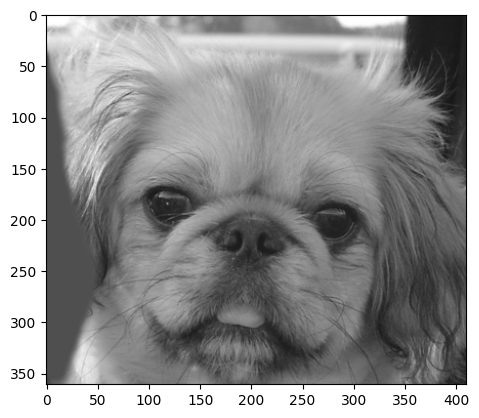

In [70]:
f = np.fft.fft2(dog_array)

inverse = np.real(np.fft.ifft2(f))

dog= Image.fromarray(inverse)
plt.imshow(dog)

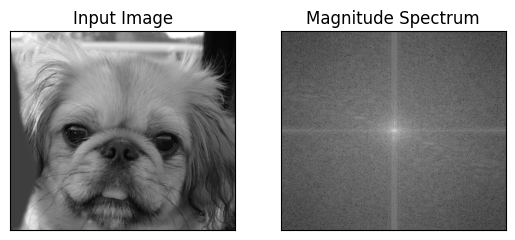

In [71]:
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

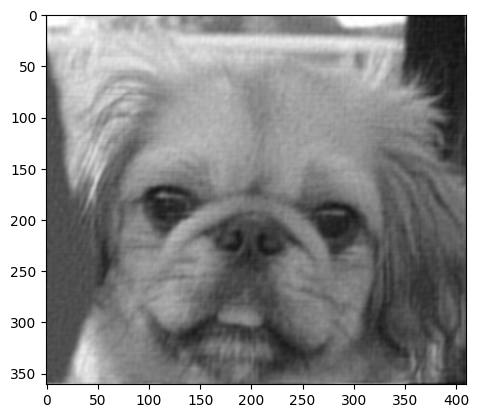

In [102]:
threshold = 10000
idx = (np.abs(f) > threshold)
f_thresh = idx*f

inverse = np.fft.ifft2(f_thresh).real

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [103]:
np.count_nonzero(f_thresh)

5741

In [107]:
5741/(361*410)

0.03878791973515303

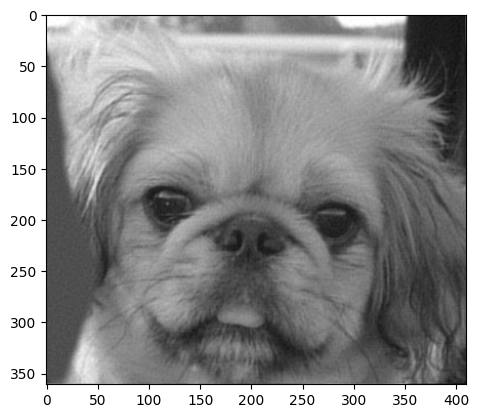

In [104]:
threshold = 5000
idx = (np.abs(f) > threshold)
f_thresh = idx*f

inverse = np.fft.ifft2(f_thresh).real

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [105]:
np.count_nonzero(f_thresh)

17301

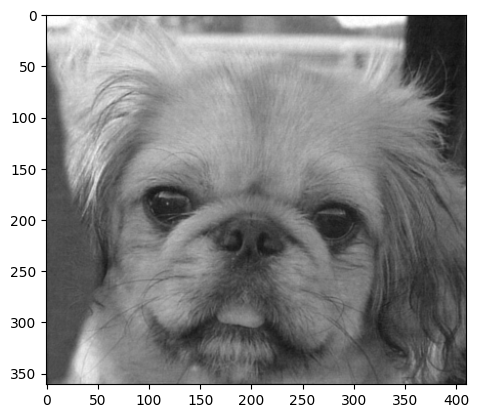

In [88]:
threshold = 1200
f_thresh = f.copy()
for x in range(f_thresh.shape[0]):
    for y in range(f_thresh.shape[1]):
        if np.abs(f_thresh[x][y])< threshold:
            f_thresh[x][y] = 0

inverse = np.real(np.fft.ifft2(f_thresh))

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [90]:
f_thresh

array([[18287778.              +0.j        ,
         -876611.74420006-1130251.5174751j ,
        -1139512.29477812-1052525.8496973j , ...,
         -133604.56952928 +855673.52535844j,
        -1139512.29477812+1052525.8496973j ,
         -876611.74420006+1130251.5174751j ],
       [ 1000395.95959956-2486469.32741355j,
           89040.27486406  +84390.84748026j,
         -452475.74320843 -528821.25343232j, ...,
          475072.57045183 +900063.78694679j,
          -90252.04528593 +540749.87674048j,
          142404.3638602  +800554.03105328j],
       [ -158908.63318558 -556985.47842935j,
          208081.03999024 +287385.27762807j,
          294547.8921575  +264668.90302555j, ...,
         -163611.42960189 +167667.2888263j ,
          259478.31388629 +277035.8797108j ,
          486780.71722955 +194424.08224444j],
       ...,
       [  323386.7830299  +962410.52365413j,
           34796.09535918 -536458.9011372j ,
           39545.59868159 -124001.3096037j , ...,
           98342.266

As we can see by taking the fourier transform and then taking the inverse we end up with the same image. 

In [73]:
flattened = dog_array.flatten()
x = np.random.randint(0,360, size = 74005 )
y = np.random.randint(0,409,size = 74005 )

sampled = np.zeros((361,410))

for n in range(len(x)):
    sampled[x[n]][y[n]] = dog_array[x[n]][y[n]]



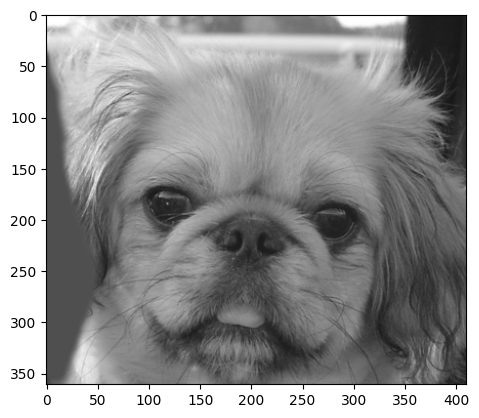

In [74]:
f_samp = np.fft.fft2(sampled)

inverse = np.real(np.fft.ifft2(f_samp))

dog_sampled= Image.fromarray(inverse)
plt.imshow(dog)

Some ideas from this image are recoverable but it is not doing an ideal job. Maybe we need to apply some sort of filter or interpoltae to get the missing pixels.

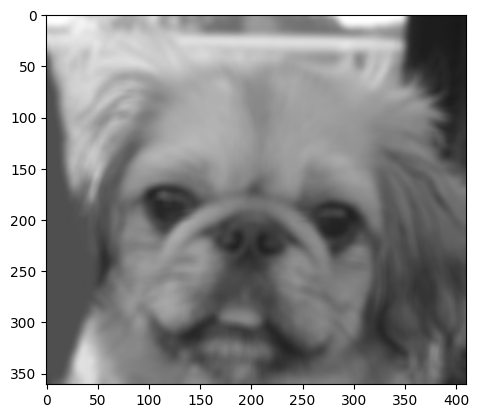

In [75]:
dog_filtered = Image.fromarray(cv2.GaussianBlur(np.array(dog),ksize= (9,9), sigmaX= 5))
plt.imshow(dog_filtered)

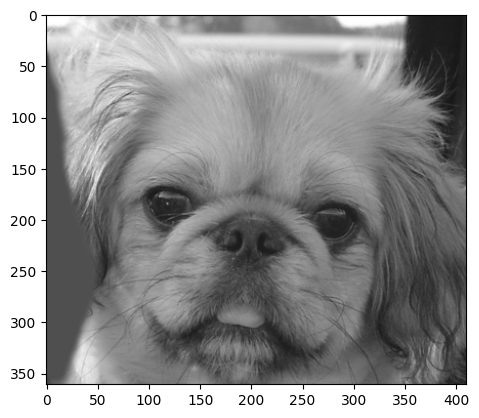

In [76]:
dog_filtered = Image.fromarray(cv2.medianBlur(np.array(dog),ksize= 1 ))
plt.imshow(dog_filtered)

Now instead of throwing away the original data now we can try to throw away the fourier coefficents to bring it very close to 0. 

In [77]:
np.max(np.real(f))

18287778.0

In [78]:
np.max(magnitude_spectrum)

334.4348705167087

In [79]:
np.min(np.abs(np.real(f)))

0.017167527477283784

In [80]:
np.mean(magnitude_spectrum)

146.03679485140728

In [81]:
threshold = 100
f_thresh = f.copy()
for x in range(f_thresh.shape[0]):
    for y in range(f_thresh.shape[1]):
        if np.abs(np.real(f_thresh[x][y]))< threshold:
            f_thresh[x][y] = 0



In [82]:
np.nonzero(np.real(f_thresh))[0].shape

(136614,)

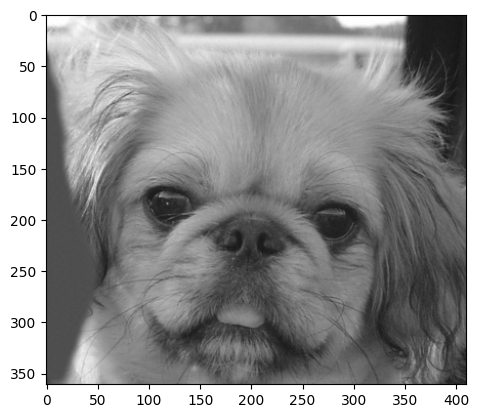

In [83]:


inverse = np.real(np.fft.ifft2(f_thresh))

dog= Image.fromarray(inverse)
plt.imshow(dog)